In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
contact_filenames = ['contact/tij_InVS13.dat',
                    'contact/tij_InVS15.dat',
                    'contact/tij_LH10.dat',
                    'contact/tij_LyonSchool.dat',
                    'contact/tij_SFHH.dat',
                    'contact/tij_Thiers13.dat']

copresence_filenames = ['co-presence/tij_pres_InVS13/dat',
                       'co-presence/tij_pres_InVS15.dat',
                       'co-presence/tij_pres_LH10.dat',
                       'co-presence/tij_pres_LyonSchool.dat',
                       'co-presence/tij_pres_SFHH.dat',
                       'co-presence/tij_pres_Thiers13.dat']

metadata_filenames = ['metadata/metadata_InVS13.dat',
                     'metadata/metadata_InVS15.dat',
                     'metadata/metadata_LH10.dat',
                     'metadata/metadata_LyonSchool.dat',
                     'metadata/metadata_SFHH.dat',
                     'metadata/metadata_Thiers13.dat']

In [16]:
def create_node_df_from_metadata_file(metadata_filename):
    with open(metadata_filename, 'r') as f:
        df = pd.DataFrame(l.rstrip().split() for l in f)
        df = pd.to_numeric(df[0])
        df = df.sort_values()
        df = df.reset_index(drop=True)
        return df

def create_tij_df_from_data_file(data_filename):
    with open(data_filename, 'r') as f:
        df = pd.DataFrame(l.rstrip().split() for l in f)
        df = df.apply(pd.to_numeric)
        return df    

def map_adj_mat_idx_to_node_id(nodes_df, adj_mat_idx):
    if adj_mat_idx in range(0, len(nodes_df)):
        return nodes_df[adj_mat_idx]
    else:
        print "Error, index {} does not map to a valid node".format(adj_mat_idx)
        return -1

def map_node_id_to_adj_mat_idx(nodes_df, node_id):
    if node_id in set(nodes_df):
        return nodes_df[nodes_df == node_id].index.item()
    else:
        print "Error, invalid node id {}".format(node_id)
        return -1
        
def create_temporally_aggregated_adj_mat(tij_df, nodes_df):
    n = len(nodes_df)
    A = np.zeros((n, n))
    
    i_col_idx = 1
    j_col_idx = 2
    
    num_rows = tij_df.shape[0]
    
    for row_idx in range(0, num_rows):
        # Pandas dataframe takes column index first, row index second
        i = map_node_id_to_adj_mat_idx(nodes_df, tij_df[i_col_idx][row_idx])
        j = map_node_id_to_adj_mat_idx(nodes_df, tij_df[j_col_idx][row_idx])
        
        # Increment edge weight
        A[i][j] += 1
        A[j][i] += 1
    
    return A

In [17]:
nodes = create_node_df_from_metadata_file(metadata_filenames[0])
tij_mat = create_tij_df_from_data_file(contact_filenames[0])
A = create_temporally_aggregated_adj_mat(tij_mat, nodes)


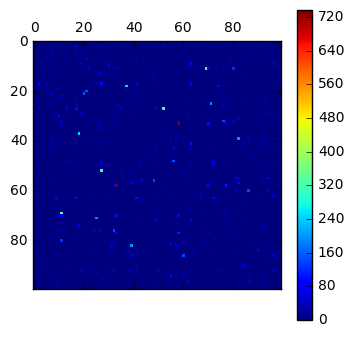

In [18]:
plt.matshow(A)
plt.colorbar()
plt.show()